In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from io import StringIO

# Part 1

## Loading of dataset

In [3]:
# Preview of the raw dataset
file_path = '12_Industry_Portfolios.csv'

# Read the csv file as plain text
with open(file_path, "r") as file:
    lines = file.readlines()

# Locate the index of the row which has "Average Equal Weighted Returns -- Monthly" in it
cut_index = [i for i, line in enumerate(lines) if "Average Equal Weighted Returns -- Monthly" in line][0]
data = "".join(lines[11:cut_index])

df = pd.read_csv(StringIO(data))
print("=== Raw Dataset Preview ===")
df

=== Raw Dataset Preview ===


,Unnamed: 0,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
0,192607,1.45,15.55,3.67,-1.18,8.01,3.16,0.83,7.04,0.11,1.77,-0.02,2.22
1,192608,3.97,3.68,2.42,3.47,5.14,1.97,2.17,-1.69,-0.71,4.25,4.47,4.34
2,192609,1.14,4.80,-0.07,-3.39,5.30,-0.34,2.41,2.04,0.21,0.69,-1.61,0.37
3,192610,-1.24,-8.23,-3.16,-0.78,-4.55,-5.38,-0.11,-2.63,-2.29,-0.57,-5.51,-2.73
4,192611,5.20,-0.19,3.82,0.01,5.11,4.79,1.63,3.71,6.43,5.42,2.34,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,202408,4.11,-5.16,0.64,-2.92,4.63,1.36,1.21,4.55,1.35,6.44,2.50,3.62
1178,202409,0.99,14.24,3.17,-3.17,2.02,2.99,5.63,5.35,3.67,-1.81,-0.51,1.98
1179,202410,-2.59,-3.14,-3.10,-0.54,-4.80,-0.17,2.36,0.71,-1.14,-3.11,2.64,-0.82
1180,202411,1.52,29.68,7.00,6.57,5.06,4.97,9.18,6.18,9.95,-0.58,12.03,7.92


# Cleaning of dataset

In [5]:
# Clean up
# Keep rows with valid dates
df = df[df[df.columns[0]].astype(str).str.match(r'^\d{6}$')]

# Rename the first column to 'Date'
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)
df

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
1926-07-01,1.45,15.55,3.67,-1.18,8.01,3.16,0.83,7.04,0.11,1.77,-0.02,2.22
1926-08-01,3.97,3.68,2.42,3.47,5.14,1.97,2.17,-1.69,-0.71,4.25,4.47,4.34
1926-09-01,1.14,4.80,-0.07,-3.39,5.30,-0.34,2.41,2.04,0.21,0.69,-1.61,0.37
1926-10-01,-1.24,-8.23,-3.16,-0.78,-4.55,-5.38,-0.11,-2.63,-2.29,-0.57,-5.51,-2.73
1926-11-01,5.20,-0.19,3.82,0.01,5.11,4.79,1.63,3.71,6.43,5.42,2.34,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,4.11,-5.16,0.64,-2.92,4.63,1.36,1.21,4.55,1.35,6.44,2.50,3.62
2024-09-01,0.99,14.24,3.17,-3.17,2.02,2.99,5.63,5.35,3.67,-1.81,-0.51,1.98
2024-10-01,-2.59,-3.14,-3.10,-0.54,-4.80,-0.17,2.36,0.71,-1.14,-3.11,2.64,-0.82


In [6]:
# Convert values to numeric and de-annualize

# Converts all string values (if any) to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Replace missing values (-99.99) to NaN
df.replace(-99.99, np.nan, inplace=True)

print(df.isnull().sum())

NoDur    0
Durbl    0
Manuf    0
Enrgy    0
Chems    0
BusEq    0
Telcm    0
Utils    0
Shops    0
Hlth     0
Money    0
Other    0
dtype: int64


## Result: No missing values in each column

In [8]:
# Convert the percentage returns to decimal (e.g. 14% --> 0.14)
# Then apply compound interest formula to convert the annual returns to monthly
# If annual returns is r, monthly return = (1 + r)^(1/12) -1

# As the original returns are in percentage format, we divide by 100 and add 1 to get the annual growth factor
# Raise it to the power of 1/12 to get the equivalent monthly growing factor
# Subtract 1 to convert back from growth factor to returns

df_monthly = (1 + df/100) ** (1/12) - 1
df_monthly

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
1926-07-01,0.001200,0.012117,0.003008,-0.000989,0.006442,0.002596,0.000689,0.005685,0.000092,0.001463,-0.000017,0.001831
1926-08-01,0.003250,0.003016,0.001995,0.002847,0.004186,0.001627,0.001791,-0.001419,-0.000594,0.003474,0.003651,0.003547
1926-09-01,0.000945,0.003915,-0.000058,-0.002870,0.004313,-0.000284,0.001986,0.001684,0.000175,0.000573,-0.001352,0.000308
1926-10-01,-0.001039,-0.007132,-0.002672,-0.000652,-0.003873,-0.004598,-0.000092,-0.002219,-0.001929,-0.000476,-0.004712,-0.002304
1926-11-01,0.004233,-0.000158,0.003129,0.000008,0.004162,0.003907,0.001348,0.003040,0.005207,0.004408,0.001929,0.001733
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,0.003362,-0.004405,0.000532,-0.002467,0.003779,0.001126,0.001003,0.003715,0.001118,0.005214,0.002060,0.002968
2024-09-01,0.000821,0.011156,0.002604,-0.002681,0.001668,0.002458,0.004575,0.004353,0.003008,-0.001521,-0.000426,0.001635
2024-10-01,-0.002184,-0.002655,-0.002621,-0.000451,-0.004091,-0.000142,0.001946,0.000590,-0.000955,-0.002629,0.002174,-0.000686


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1400x600 with 0 Axes>

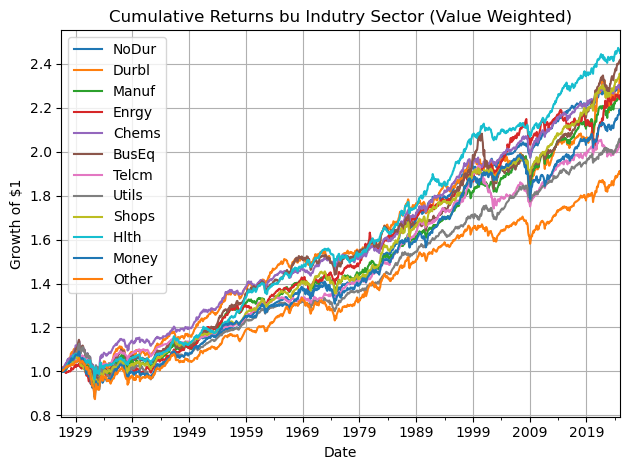

In [9]:
# Plot cumulative returns
# Calculate the cumulative product of the monthly returns to simulate the growth of $1 investment for each industry
cumulative_returns = (1 + df_monthly).cumprod()

# Set up the figure size and plot the cumulative returns for all 12 sectors
plt.figure(figsize=(14, 6))
cumulative_returns.plot()
plt.title("Cumulative Returns bu Indutry Sector (Value Weighted)")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

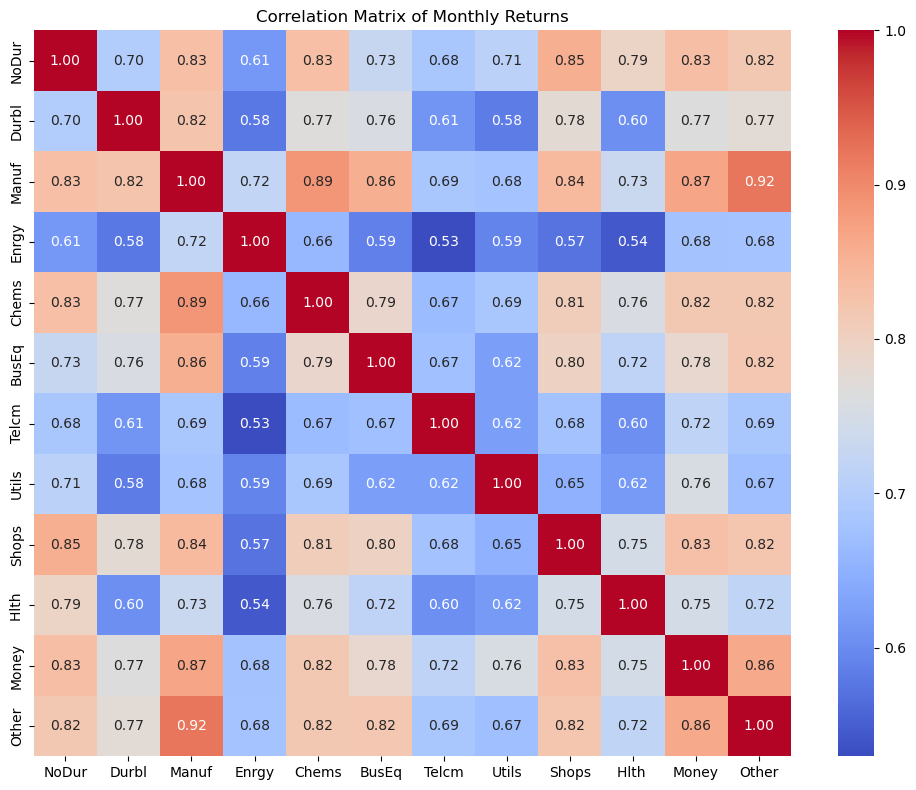

In [10]:
# Plot correlation matrix
# Visualise correlation matrix as a heatmap

plt.figure(figsize=(10, 8))
# Show correlation with color gradients
sns.heatmap(df_monthly.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Monthly Returns")
plt.tight_layout()
plt.show

# Part 2

In [12]:
# Load CLI and CPI datasets
cli = pd.read_csv("USALOLITOAASTSAM.csv")
cpi = pd.read_csv("CPILFESL.csv")

# Convert observation_date to datetime and set as index
cli['Date'] = pd.to_datetime(cli['observation_date'])
cli.set_index('Date', inplace=True)
cli.drop(columns='observation_date', inplace=True)

cpi['Date'] = pd.to_datetime(cpi['observation_date'])
cpi.set_index('Date', inplace=True)
cpi.drop(columns='observation_date', inplace=True)

# Rename column headers
cli.rename(columns={"USALOLITOAASTSAM": "CLI"}, inplace=True)
cpi.rename(columns={"CPILFESL": "CPI"}, inplace=True)

# Align both datasets to start from the same common period
combined = cli.join(cpi, how='inner')

# Check for missing values in the combined dateset
print("Missing values in combined dataset: ")
print(combined.isnull().sum())

Missing values in combined dataset: 
CLI    0
CPI    0
dtype: int64


In [13]:
# Compute the 3-month rolling averages
cli_roll_latest = combined['CLI'].rolling(window=3).mean()
cli_roll_prev = combined['CLI'].rolling(window=3).mean().shift(3)
cpi_roll_latest = combined['CPI'].rolling(window=3).mean()
cpi_roll_prev = combined['CPI'].rolling(window=3).mean().shift(3)

# Calculate the 3m/3m annualized growth rates
combined['CLI_growth'] = ((cli_roll_latest / cli_roll_prev) ** 4 - 1) * 100
combined['CPI_growth'] = ((cpi_roll_latest / cpi_roll_prev) ** 4 - 1) * 100

# Since the first few rows will contain NaNs caused by rolling computation, drop them
combined.dropna(subset=['CLI_growth', 'CPI_growth'], inplace=True)
combined

,CLI,CPI,CLI_growth,CPI_growth
Date,,,,
1957-06-01,99.270535,28.900,-2.967981,3.303558
1957-07-01,98.943718,29.000,-3.194843,2.816729
1957-08-01,98.544412,29.000,-3.508592,2.810133
1957-09-01,98.075575,29.100,-4.032783,2.803569
1957-10-01,97.582599,29.200,-4.694439,2.797034
...,...,...,...,...
2024-11-01,100.286141,322.619,1.470219,3.397103
2024-12-01,100.421931,323.296,1.745907,3.374922
2025-01-01,100.501825,324.739,1.745737,3.491321


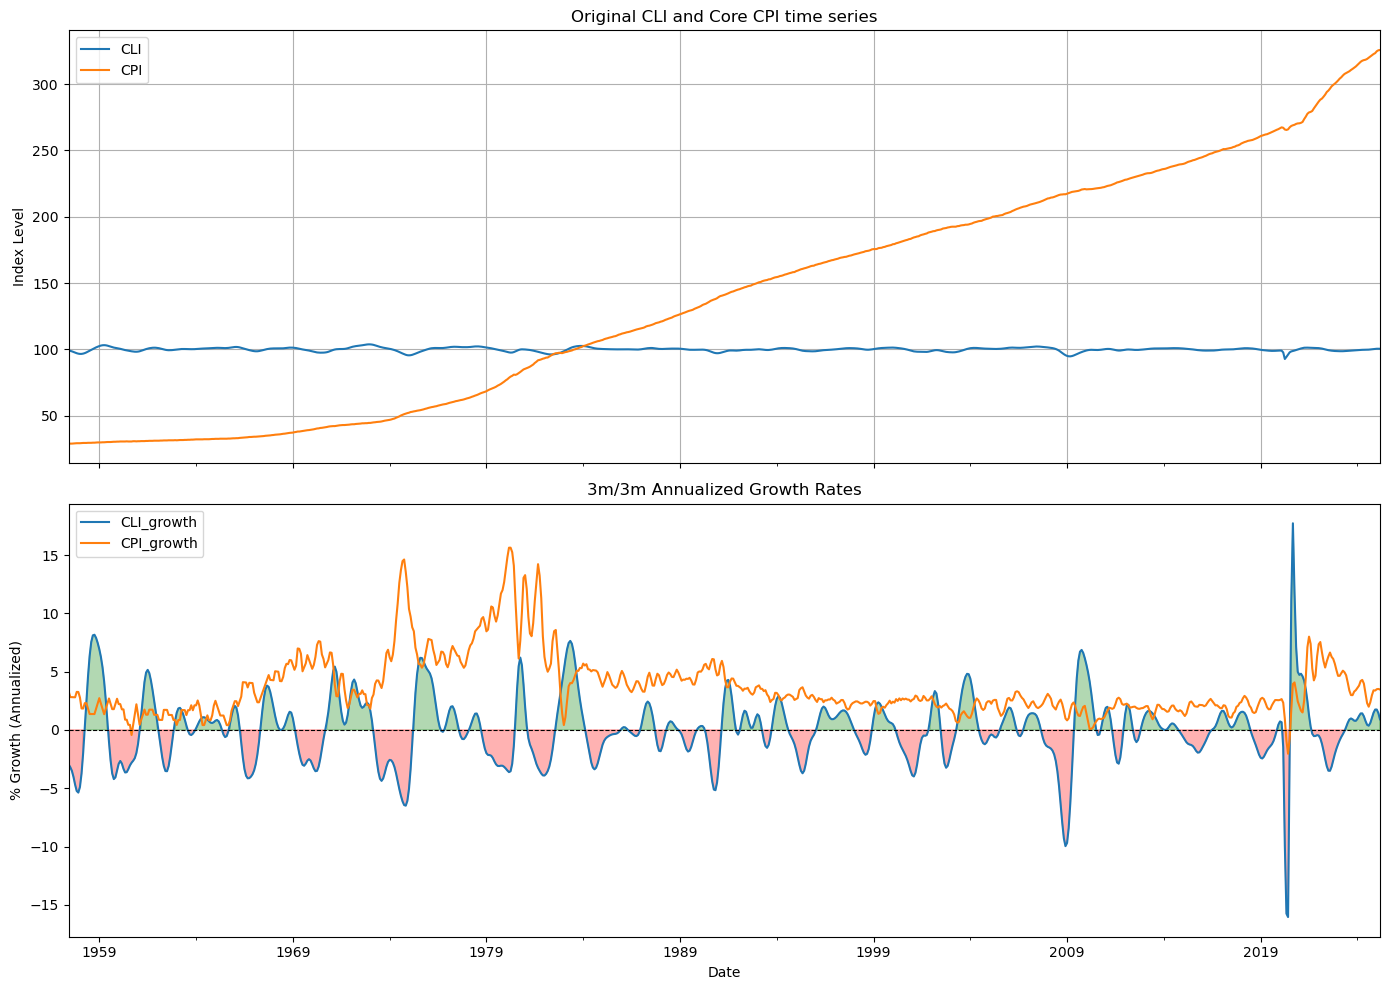

In [14]:
# Plotting of Original CLI and CPI time series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

combined[['CLI', 'CPI']].plot(ax=ax1)
ax1.set_title('Original CLI and Core CPI time series')
ax1.set_ylabel('Index Level')
ax1.grid(True)

# Plotting of 3m/3m growth rates
combined[['CLI_growth', 'CPI_growth']].plot(ax=ax2)
ax2.set_title('3m/3m Annualized Growth Rates')
ax2.set_ylabel('% Growth (Annualized)')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Color fill areas for CLI only
ax2.fill_between(combined.index, 0, combined['CLI_growth'], where=(combined['CLI_growth'] >= 0), color='green', alpha=0.3)
ax2.fill_between(combined.index, 0, combined['CLI_growth'], where=(combined['CLI_growth'] < 0), color='red', alpha=0.3)

plt.tight_layout()
plt.show()

## Reasons for shading the CLI:

Shading the CLI helps emphasize when the economy is accelerating or decelerating, which is central to identifying macro regimes. Applying shading to both the CLI and CPI graphs could reduce readability and clutter the visualisation.

# Part 3

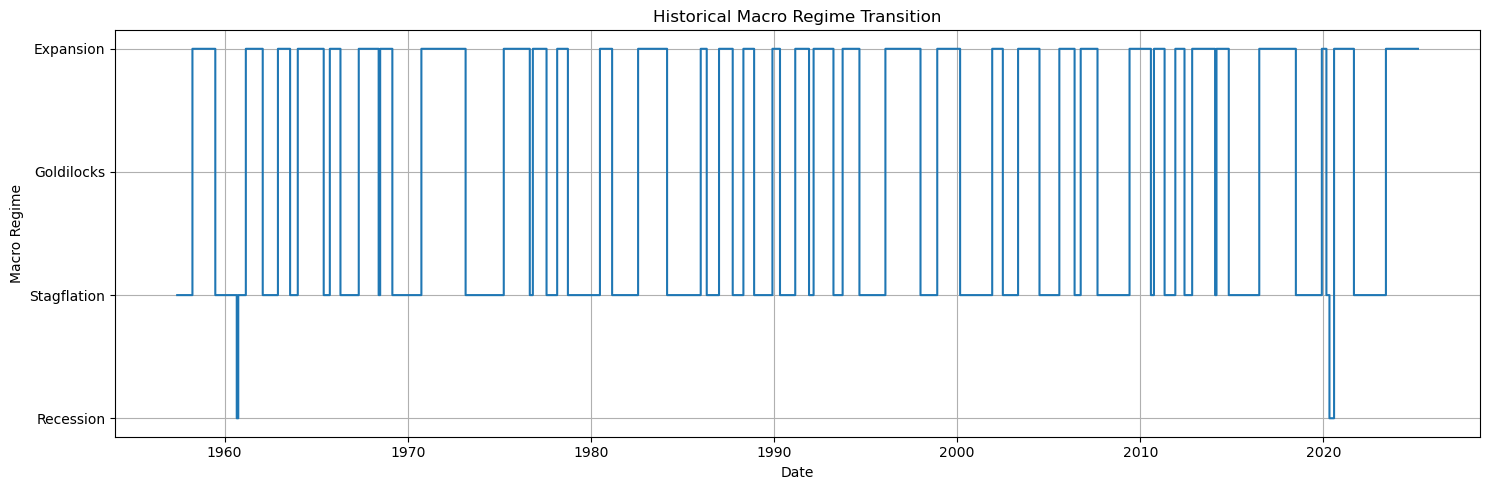

In [17]:
# Define macro regimes
def classify_regime(row):
    if row['CLI_growth'] > 0 and row['CPI_growth'] > 0:
        return 'Expansion'
    elif row['CLI_growth'] > 0 and row['CPI_growth'] <= 0:
        return 'Goldilocks'
    elif row['CLI_growth'] <= 0 and row['CPI_growth'] > 0:
        return 'Stagflation'
    elif row['CLI_growth'] <= 0 and row['CPI_growth'] <= 0:
        return 'Recession'

combined['Regime'] = combined.apply(classify_regime, axis=1)

# Map the regimes to numeric values for plotting
regime_map = {'Expansion': 3, 'Goldilocks': 2, 'Stagflation': 1, 'Recession': 0}
combined['Regime_code'] = combined['Regime'].map(regime_map)

# Visualise the regime transition
plt.figure(figsize=(15, 5))
plt.plot(combined.index, combined['Regime_code'], drawstyle='steps-post')
plt.yticks(list(regime_map.values()), list(regime_map.keys()))
plt.title('Historical Macro Regime Transition')
plt.xlabel('Date')
plt.ylabel('Macro Regime')
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 4

In [19]:
# Filter usable return dates (start from 1970)

returns = df_monthly.copy()
returns = returns[(returns.index >= '1957-01') & (returns.index <= '2024-12')]
combined = combined[(combined.index >= '1957-01') & (combined.index <= '2024-12')]

/var/folders/gx/j1s843cj2s39775nmqp3zvlw0000gn/T/ipykernel_92511/363399703.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[top_5] = 0.2
/var/folders/gx/j1s843cj2s39775nmqp3zvlw0000gn/T/ipykernel_92511/363399703.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[top_5] = 0.2
/var/folders/gx/j1s843cj2s39775nmqp3zvlw0000gn/T/ipykernel_92511/363399703.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[top_5] = 0.2
/var/folders/gx/j1s843

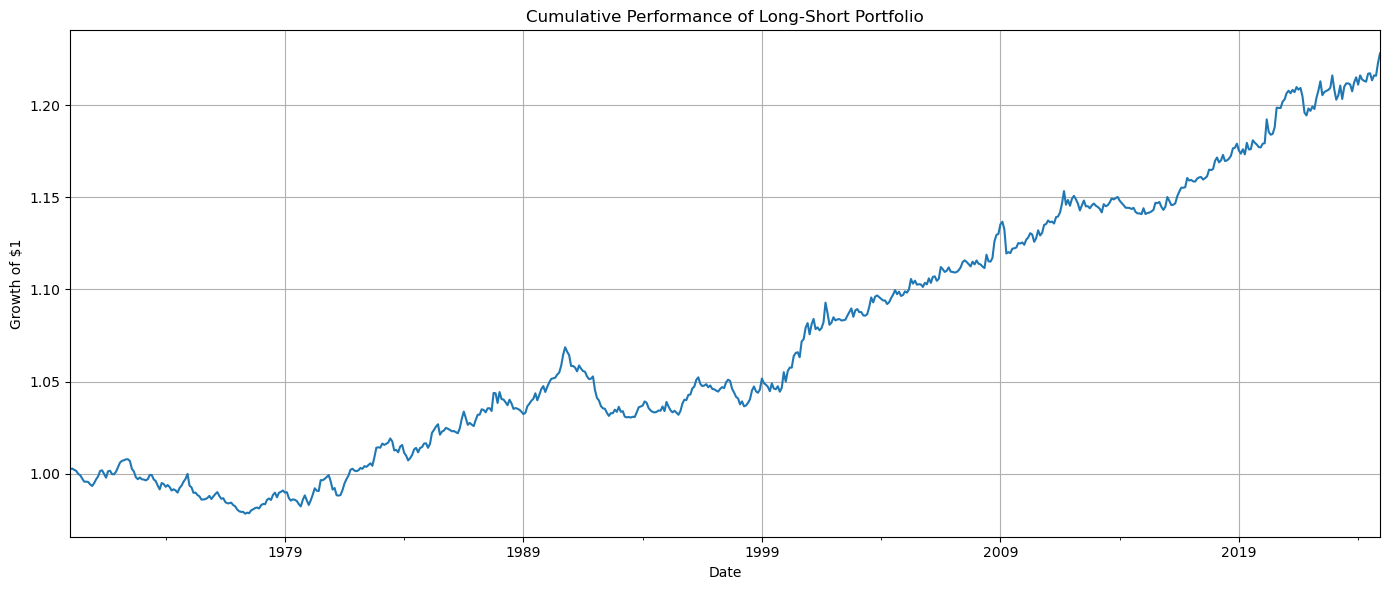

In [20]:
long_short_returns = []

for date in returns.index:
    if date < pd.Timestamp('1970-01') or date not in combined.index:
        continue

    regime = combined.loc[date, 'Regime']
    past_dates = combined[(combined.index < date) & (combined['Regime'] == regime)].index

    if len(past_dates) == 0:
        long_short_returns.append((date, 0))
        continue

    past_performance = returns.loc[past_dates].mean()
    top_5 = past_performance.nlargest(5).index
    bottom_5 = past_performance.nsmallest(5).index

    # Set the weights
    weights = pd.Series(0, index=returns.columns)
    weights[top_5] = 0.2
    weights[bottom_5] = -0.2

    monthly_return = (returns.loc[date] * weights).sum()
    long_short_returns.append((date, monthly_return))

# Create portfolio DataFrame
portfolio_df = pd.DataFrame(long_short_returns, columns=['Date', 'LongShortReturn']).set_index('Date')
portfolio_df['CumulativeReturn'] = (1 + portfolio_df['LongShortReturn']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 6))
portfolio_df['CumulativeReturn'].plot()
plt.title('Cumulative Performance of Long-Short Portfolio')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 5

In [22]:
# Assign equal weights for each sector
equal_weights = np.repeat(1 / df_monthly.shape[1], df_monthly.shape[1])

# Multiply the monthly returns for each sector with equal weights
equal_weight_return = df_monthly.dot(equal_weights)

# Cumulative return is computed as compounded product of (1 + monthly return)
equal_cum_returns = (1 + equal_weight_return).cumprod()

# Calculate the rolling 5 year standard deviation (60 months) for each sector
rolling_vol = df_monthly.rolling(window=60).std()

# Find the inverse of volatility and assign lower weight to more volatile sectors
inv_vol_weights = 1/ rolling_vol
inv_vol_weights = inv_vol_weights.div(inv_vol_weights.sum(axis=1), axis=0) # Normalize

# Multiply each sector by its weight and sum across sectors to get the portfolio return
inv_vol_returns = (df_monthly * inv_vol_weights).sum(axis=1)

inv_cum_returns = (1 + inv_vol_returns).cumprod()

<Figure size 1400x600 with 0 Axes>

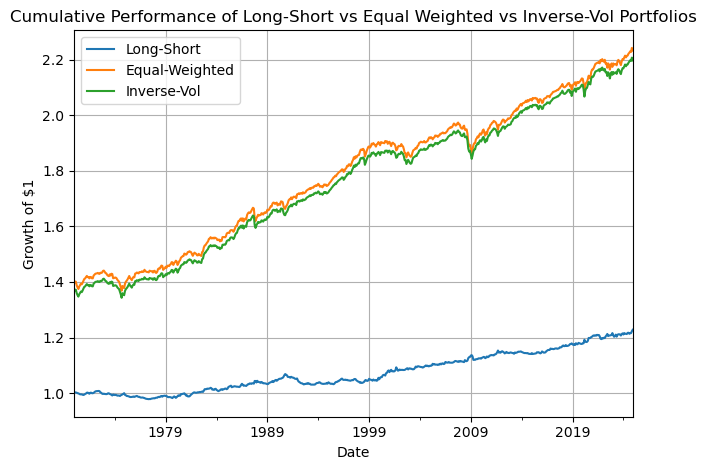

In [23]:
# Combine the cumulative returns
benchmark_df = pd.DataFrame({
    'Long-Short': portfolio_df['CumulativeReturn'],
    'Equal-Weighted': equal_cum_returns,
    'Inverse-Vol': inv_cum_returns
}).dropna() # Drop the months where the return series is missing

# Plot cumulative returns
plt.figure(figsize=(14, 6))
benchmark_df.plot()
plt.title('Cumulative Performance of Long-Short vs Equal Weighted vs Inverse-Vol Portfolios')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.grid(True)
plt.tight_layout()
plt.show()

## Performance Comparison

The equal weighted and inverse-volatility portfolios grow faster than the long-short portfolio. But the long-short strategy focuses on adapting to different economic conditions using past data. While it does not grow as quickly, it may help reduce risk during downturns

<Figure size 1400x600 with 0 Axes>

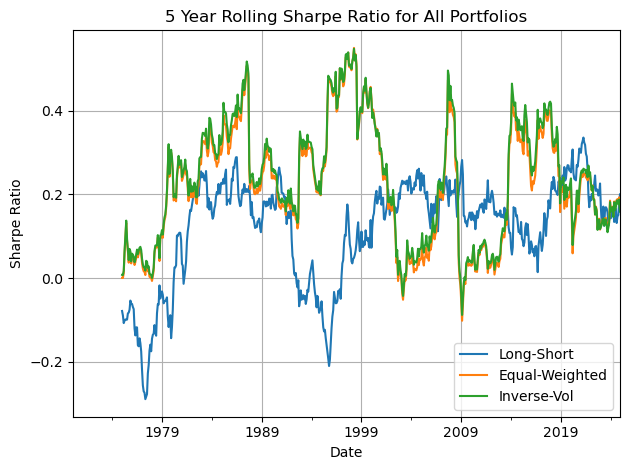

In [25]:
# Convert cumulative returns back to monthly returns
monthly_returns = benchmark_df.pct_change().dropna()

# Sharpe = Rolling Mean / Rolling Std
rolling_sharpe = monthly_returns.rolling(window=60).mean() / monthly_returns.rolling(window=60).std()

# Plot Rolling Sharpe Ratio
plt.figure(figsize=(14, 6))
rolling_sharpe.plot()
plt.title('5 Year Rolling Sharpe Ratio for All Portfolios')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

## Comments:

The 5 year rolling Sharpe ratio shows how much portfolio performed after adjusting for risk. The equal weighted and inverse-vol portfolios had more stable and consistent Sharpe ratios. The Long-Short strategy was more volatilem sometimes going negative which reflects its sensitivity to changing macro regimes. While it did not always outperform, it may be useful during certain economic shifts.

# Part 6